In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
datapath = '/home/rory/1101.csv'
data = pd.read_csv(datapath)

In [3]:
def Cl_move_1(data):
    dataList = range(data['Date'].size)
    List = []
    List.append(0)
    for i in dataList:
        tmp = data['Close'][i]
        List.append(tmp)
    tmpSeries = pd.Series(List)
    data['Close1']=tmpSeries

In [4]:
Cl_move_1(data)

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,Close1
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.00
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,12.60
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,12.44
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,12.24
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,12.01


In [6]:
# Volumn_n Rise Ratio 漲幅比
def RR_V2(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Volume_m'][item]-data['Volume_m'][item-1])/data['Volume_m'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_V2']=tmpSeries

In [7]:
RR_V2(data)

In [9]:
(187464.0-62200.0)/62200.0

2.0138906752411576

In [10]:
data.head(2)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,Close1,RR_V2
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.0,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,12.6,201.389068


In [11]:
# 相對強弱指標(RSI) 建議6
def RSI_V2(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR_V2'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_V2'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_V2'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_V2'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_V2'+str(day)] = tmpSeries

In [12]:
RSI_V2(data,2)
RSI_V2(data,3)
RSI_V2(data,4)
RSI_V2(data,5)
RSI_V2(data,6)
RSI_V2(data,7)
RSI_V2(data,8)
RSI_V2(data,9)
RSI_V2(data,10)
RSI_V2(data,11)
RSI_V2(data,12)
RSI_V2(data,13)
RSI_V2(data,14)
RSI_V2(data,15)
RSI_V2(data,16)
RSI_V2(data,17)

In [13]:
data.head(20)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,Close1,...,RSI_V28,RSI_V29,RSI_V210,RSI_V211,RSI_V212,RSI_V213,RSI_V214,RSI_V215,RSI_V216,RSI_V217
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,12.60,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,12.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,12.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,12.01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,11.87,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,11.77,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,11.11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,11.34,...,81.924588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.58,...,80.753972,80.753972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


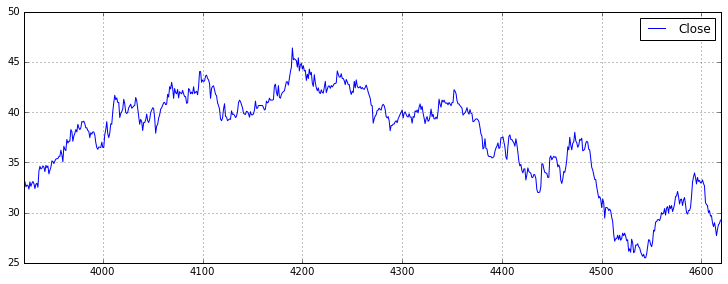

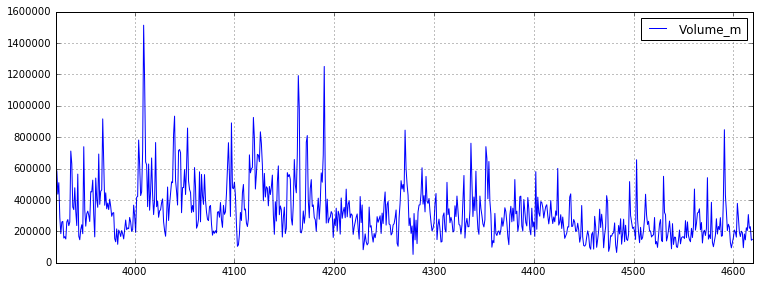

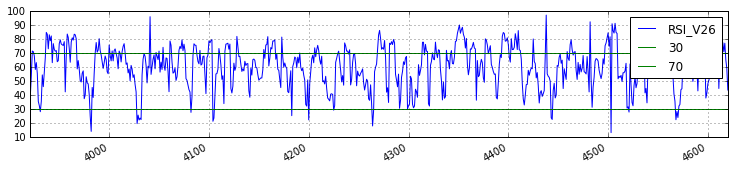

In [15]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4.5)
data[["Close"]][3921:4621].plot()
plt.grid()
figsize(12.5, 4.5)
data[["Volume_m"]][3921:4621].plot()
plt.grid()
figsize(12.5, 2.5)
data[["RSI_V26"]][3921:4621].plot(subplots = True)
plt.axhline(30,color = 'g',linestyle = '-',label = '30')
plt.axhline(70,color = 'g',linestyle = '-',label = '70')

plt.grid()
plt.legend();

In [16]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries

In [17]:
UP_DOWN(data)

In [18]:
data.head(10)

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,Close1,...,RSI_V29,RSI_V210,RSI_V211,RSI_V212,RSI_V213,RSI_V214,RSI_V215,RSI_V216,RSI_V217,UP_DOWN
0,1998/1/3,12.84,12.84,12.60,12.60,1624.0,62200.0,-1.81,26.76,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1998/1/5,12.60,12.70,12.44,12.44,4952.0,187464.0,-1.32,26.41,12.60,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1998/1/6,12.44,12.44,12.21,12.24,3408.0,126192.0,-1.60,25.99,12.44,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1998/1/7,12.27,12.40,12.01,12.01,3207.0,117772.0,-1.90,25.49,12.24,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1998/1/8,11.97,12.11,11.87,11.87,3072.0,110927.0,-1.11,25.21,12.01,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1998/1/9,11.87,11.91,11.61,11.77,3892.0,137463.0,-0.84,25.00,11.87,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1998/1/12,11.61,11.67,11.11,11.11,2892.0,99120.0,-5.63,23.59,11.77,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1998/1/13,11.28,11.38,11.11,11.34,3604.0,121966.0,2.09,24.08,11.11,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1998/1/14,11.51,11.64,11.38,11.58,2606.0,90755.0,2.05,24.58,11.34,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,1998/1/15,11.64,11.64,11.28,11.28,2899.0,100153.0,-2.58,23.94,11.58,...,80.753972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
data1 = data.drop(['Date', 'Open', 'High','Low','Close','Close1','Volume_n','Volume_m','return','PE','RR_V2'], axis=1)

In [21]:
data1.head()

,RSI_V22,RSI_V23,RSI_V24,RSI_V25,RSI_V26,RSI_V27,RSI_V28,RSI_V29,RSI_V210,RSI_V211,RSI_V212,RSI_V213,RSI_V214,RSI_V215,RSI_V216,RSI_V217,UP_DOWN
0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,86.03659,86.036590,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.00000,91.098413,91.098413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
cols = data1.columns.tolist()
cols[16]

'UP_DOWN'

In [23]:
data1 = data1[[cols[16]] + cols[0:15]]

In [24]:
data1.head(20)

,UP_DOWN,RSI_V22,RSI_V23,RSI_V24,RSI_V25,RSI_V26,RSI_V27,RSI_V28,RSI_V29,RSI_V210,RSI_V211,RSI_V212,RSI_V213,RSI_V214,RSI_V215,RSI_V216
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,86.036590,86.036590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.000000,91.098413,91.098413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,0.000000,0.000000,93.043801,93.043801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,80.453169,79.305893,61.372530,88.210674,88.210674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,46.167850,58.668772,63.994674,56.703889,86.048389,86.048389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,45.245103,45.710397,58.221418,63.569170,56.251127,81.924588,81.924588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0,47.387794,46.291667,46.758533,54.300903,58.746840,54.344420,80.753972,80.753972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
data2 = data1.values
data2 = data2[15:,]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

imputer = Imputer(missing_values=-1)

classifier = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline([
    ('imp', imputer),
    ('clf', classifier),
])

In [27]:
parameter_grid = {
    'imp__strategy': ['mean', 'median'],
    'clf__max_features': [0.2,0.5,0.8,1], #[0.2,0.5,0.8,1],
    'clf__max_depth': [1,3,5,7] #[1,3,5,7,9,11],
}

In [28]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv = 5, verbose=3)
grid_search.fit(data2[0:,1:], data2[0:,0])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.594360 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.594360 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.595005 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.595005 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean .....
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strategy=mean, score=0.594565 -   0.3s
[CV] clf__max_features=0.2, clf__max_depth=1, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=1, imp__strat

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   12.6s


[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.594360 -   0.4s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595005 -   0.4s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.595005 -   0.2s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=mean .......
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=mean, score=0.594565 -   0.2s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=median, score=0.594360 -   0.2s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_depth=1, imp__strategy=median, score=0.594360 -   0.2s
[CV] clf__max_features=1, clf__max_depth=1, imp__strategy=median .....
[CV]  clf__max_features=1, clf__max_

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:  1.8min


[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.593920 -   1.0s
[CV] clf__max_features=0.2, clf__max_depth=7, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.586319 -   1.0s
[CV] clf__max_features=0.2, clf__max_depth=7, imp__strategy=median ...
[CV]  clf__max_features=0.2, clf__max_depth=7, imp__strategy=median, score=0.582609 -   1.0s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.584599 -   1.9s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.588937 -   2.2s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean, score=0.590662 -   2.3s
[CV] clf__max_features=0.5, clf__max_depth=7, imp__strategy=mean .....
[CV]  clf__max_feature

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('imp', Imputer(axis=0, copy=True, missing_values=-1, strategy='mean', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__max_features': [0.2, 0.5, 0.8, 1], 'clf__max_depth': [1, 3, 5, 7], 'imp__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [30]:
sorted(grid_search.grid_scores_, key = lambda x: x.mean_validation_score)
grid_search.best_score_,grid_search.best_params_

(0.59465914025184541,
 {'clf__max_depth': 1, 'clf__max_features': 0.2, 'imp__strategy': 'mean'})

In [31]:
for i in data1.columns.tolist():
    #print(i ,data[i])
    data1[i] = data1[i].map(lambda x : data1[i].mean() if x == -1 else x)

In [32]:
data1.head(17)

,UP_DOWN,RSI_V22,RSI_V23,RSI_V24,RSI_V25,RSI_V26,RSI_V27,RSI_V28,RSI_V29,RSI_V210,RSI_V211,RSI_V212,RSI_V213,RSI_V214,RSI_V215,RSI_V216
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,86.036590,86.036590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.000000,91.098413,91.098413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,0.000000,0.000000,93.043801,93.043801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,80.453169,79.305893,61.372530,88.210674,88.210674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,46.167850,58.668772,63.994674,56.703889,86.048389,86.048389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,45.245103,45.710397,58.221418,63.569170,56.251127,81.924588,81.924588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0,47.387794,46.291667,46.758533,54.300903,58.746840,54.344420,80.753972,80.753972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
data_ml = data1.values

In [34]:
X = data_ml[16:,1:]
Y = data_ml[16:,0]

In [42]:
#X[15:,0:][1:17]

In [35]:
n = len(data_ml[16:,1:])/2

In [36]:
n

2302

In [37]:
X_train = X[:n, :]
Y_train = Y[:n]

X_test = X[n:, :]
Y_test = Y[n:]

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 1, max_features = 0.2)
model = model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

print "prediction accuracy:", np.sum(Y_test == Y_prediction)*1./len(Y_test)

prediction accuracy: 0.57012592271


In [39]:
model.feature_importances_ 

array([ 0.07,  0.07,  0.07,  0.1 ,  0.09,  0.05,  0.02,  0.07,  0.07,
        0.11,  0.04,  0.07,  0.05,  0.04,  0.08])

In [40]:
data1.columns#[25],data1.columns[37]

Index([u'UP_DOWN', u'RSI_V22', u'RSI_V23', u'RSI_V24', u'RSI_V25', u'RSI_V26',
       u'RSI_V27', u'RSI_V28', u'RSI_V29', u'RSI_V210', u'RSI_V211',
       u'RSI_V212', u'RSI_V213', u'RSI_V214', u'RSI_V215', u'RSI_V216'],
      dtype='object')

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
cm = confusion_matrix(Y_test, Y_prediction)
cm

array([[1313,    0],
       [ 990,    0]])

In [43]:
pd.crosstab(Y_test, Y_prediction, rownames=['actual'], colnames=['preds'])

preds,0.0
actual,
0.0,1313
1.0,990


In [44]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

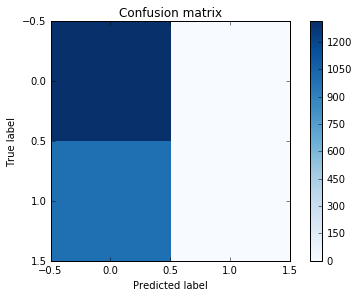

In [45]:
plot_confusion_matrix(cm)
plt.show()

In [46]:
data_p = data[['Close','Open']][2310:4621].values

In [47]:
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])

In [48]:
result = np.c_[Y_test,Y_prediction]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result1.head()

,test,prediction
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [49]:
result2 = pd.concat([data_p1, result1], axis=1)
result2.head()

,Close,Open,test,prediction
0,18.12,17.93,0.0,0.0
1,17.81,18.24,1.0,0.0
2,17.51,17.69,0.0,0.0
3,17.51,17.45,0.0,0.0
4,17.35,17.51,0.0,0.0


In [50]:
result2["Cl - Op"] = result2['Close'] - result2['Open']

In [51]:
result2['profit'] = result2['Cl - Op'] * result2['prediction']

In [52]:
a = result2['profit'].cumsum()
result2['cumsum'] = a
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum
0,18.12,17.93,0.0,0.0,0.19,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0


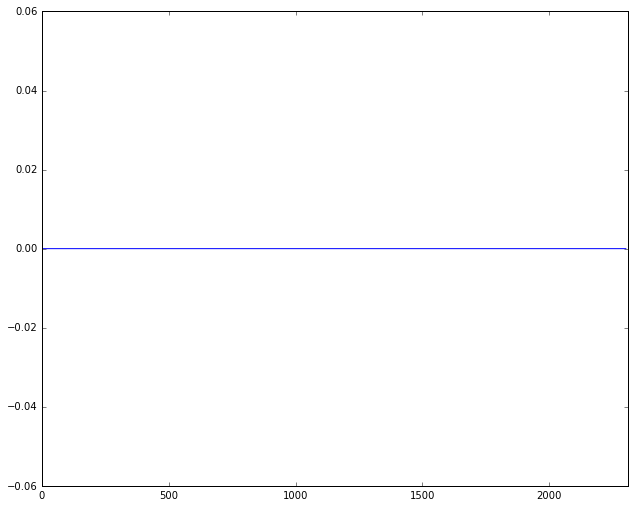

In [53]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

In [54]:
result2['processing fee'] = (result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)) * result2['prediction']

In [55]:
result2['profit_r_fee'] = result2['profit'] - result2['processing fee']

In [56]:
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee
0,18.12,17.93,0.0,0.0,0.19,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0


In [57]:
b = result2['profit_r_fee'].cumsum()
result2['cumsum_r_fee'] = b
result2.head()

,Close,Open,test,prediction,Cl - Op,profit,cumsum,processing fee,profit_r_fee,cumsum_r_fee
0,18.12,17.93,0.0,0.0,0.19,0.0,0.0,0.0,0.0,0.0
1,17.81,18.24,1.0,0.0,-0.43,-0.0,0.0,0.0,-0.0,0.0
2,17.51,17.69,0.0,0.0,-0.18,-0.0,0.0,0.0,-0.0,0.0
3,17.51,17.45,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0
4,17.35,17.51,0.0,0.0,-0.16,-0.0,0.0,0.0,-0.0,0.0


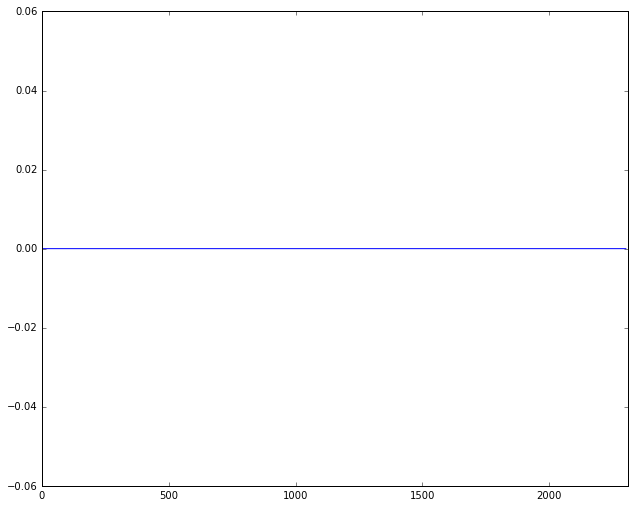

In [58]:
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
result2['cumsum_r_fee'].plot()